# 911 Calls Capstone Project

For this capstone project I will be analyzing data from 911 call. 

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)...#this column is ignored

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** How many unique title codes are there? **

In [8]:
df['title'].nunique()

110

In [9]:
df['title'].unique() #to get the number of unique values you have to use nunique() 

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

## Creating New Features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. 

I will incoporate the use of .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [10]:
df['Test'] = df['title'].str.split(':')

In [11]:
df['Test'] #incorrect

0             [EMS,  BACK PAINS/INJURY]
1            [EMS,  DIABETIC EMERGENCY]
2                [Fire,  GAS-ODOR/LEAK]
3             [EMS,  CARDIAC EMERGENCY]
4                     [EMS,  DIZZINESS]
                      ...              
99487    [Traffic,  VEHICLE ACCIDENT -]
99488    [Traffic,  VEHICLE ACCIDENT -]
99489               [EMS,  FALL VICTIM]
99490           [EMS,  NAUSEA/VOMITING]
99491    [Traffic,  VEHICLE ACCIDENT -]
Name: Test, Length: 99492, dtype: object

In [12]:
df['title']
df['title'].iloc[0] #'EMS: BACK PAINS/INJURY'
x = df['title'].iloc[0] #'EMS: BACK PAINS/INJURY'
x.split(':') #['EMS', ' BACK PAINS/INJURY']
x.split(':')[0] #['EMS']
y = x.split(':')[0] #['EMS']
y

'EMS'

In [13]:
df['reason'] = df['title'].apply(lambda y: y.split(':')[0])
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [14]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** Data Visualization **

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reason', ylabel='count'>

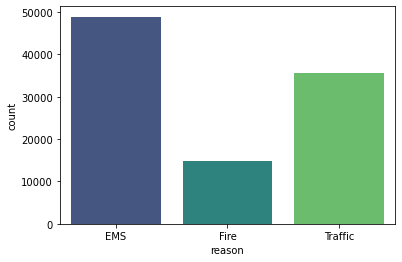

In [15]:
#Creating a countplot of 911 Calls by Reason

sns.countplot(df['reason'], palette = 'viridis')

** Now let us begin to focus on time information. Determining the data type of the objects in the timeStamp column. **

In [16]:
type(df['timeStamp'].iloc[0])

str

** Converting the column from strings to DateTime objects. **

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [18]:
#Using the .apply() method to generate 3 new columns called Hour, Month, and Day of Week.

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [19]:
df['Day of Week'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [20]:
#The Day of Week field is an integer field with values of 0-6. I will use .map() to map the strings names with the day of the week.

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
df['Day of Week'] = df['Day of Week'].map(dmap)

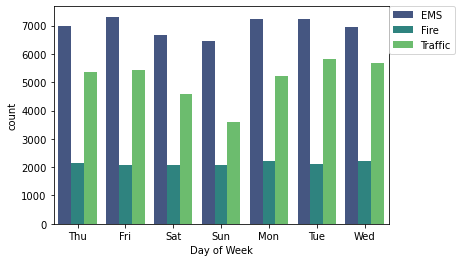

In [22]:
sns.countplot(x = 'Day of Week' , data = df, hue = 'reason', palette = 'viridis' )
plt.legend(bbox_to_anchor=(1.0, 1), loc = 2, borderaxespad=0)

**Now the same for Month:**

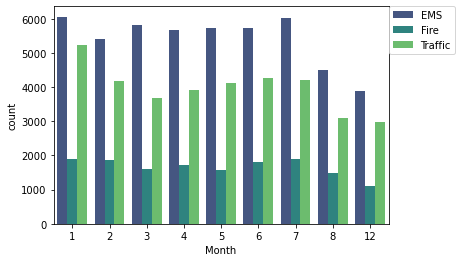

In [15]:
sns.countplot(x = 'Month', data = df, hue = 'reason', palette = 'viridis')
plt.legend(bbox_to_anchor=(1.0, 1), loc = 2, borderaxespad=0)

** The plot above is showing that some of the months are missing, I will create a new groupby object called byMonth where I can group the DataFrame by the month column and then use the count() method for aggregation. **

In [16]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'reason', 'Hour', 'Month', 'Day of Week'],
      dtype='object')

In [22]:
by_Month = df.groupby('Month').count()
by_Month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [23]:
by_Month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Creating a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

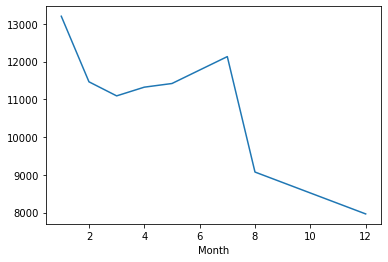

In [24]:
by_Month['twp'].plot()

** Using seaborn to generate a simple lmplot() to create a linear fit on the number of calls per month. **

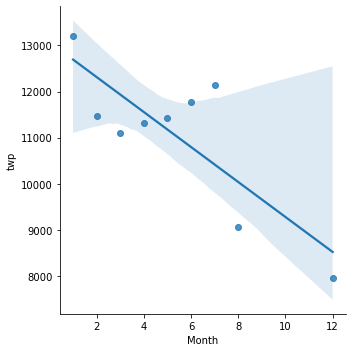

In [27]:
sns.lmplot(x = 'Month', y = 'twp', data = by_Month.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column using apply along with the .date() method. ** 

In [28]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'reason', 'Hour', 'Month', 'Day of Week'],
      dtype='object')

In [29]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [37]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [38]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

** Performing a groupby the new Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [40]:
by_Date = df.groupby('Date').count()

In [41]:
by_Date

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


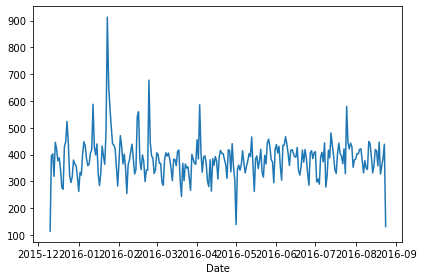

In [45]:
by_Date = df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Generating 3 new and separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

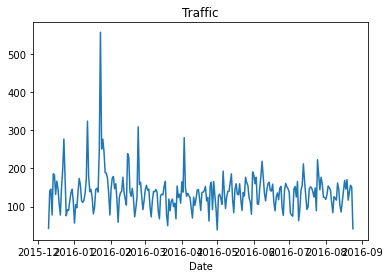

In [53]:
df[df['reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

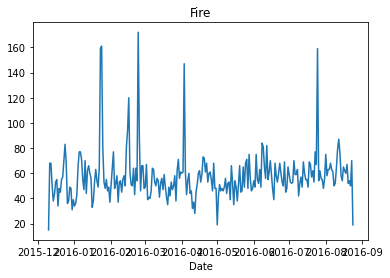

In [54]:
df[df['reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

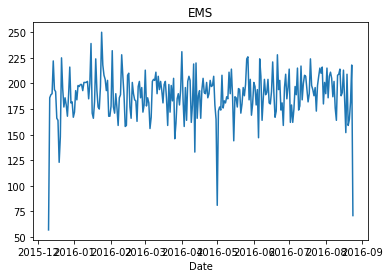

In [56]:
df[df['reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

** Now that the data has been explored and visualized I will begin to create heatmaps to further explore and show correlations within the data. However, I will first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [58]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['reason'].unstack()
dayHour.head()

#unstack: Returns a DataFrame having a new level of column labels whose inner-most level consists of the
#pivoted index labels.

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

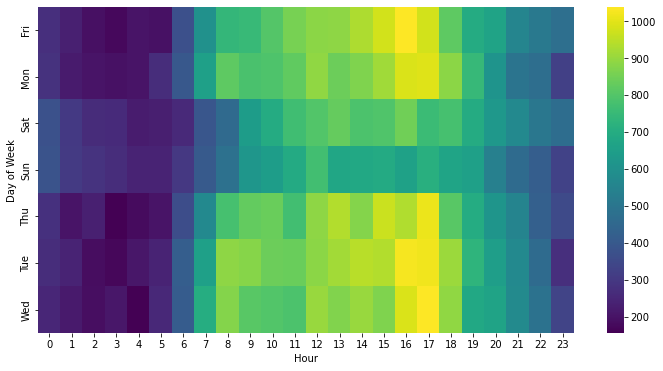

In [62]:
plt.figure(figsize = (12,6))
sns.heatmap(dayHour, cmap = 'viridis')

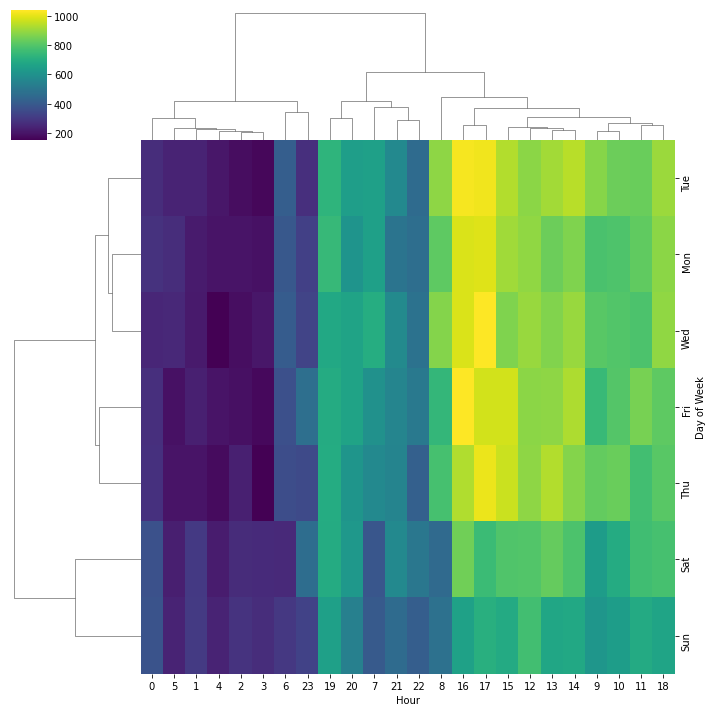

In [64]:
sns.clustermap(dayHour, cmap = 'viridis')

** The above heatmap and clustermaps were repeated for a DataFrame that shows the Month as the column. **

In [65]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

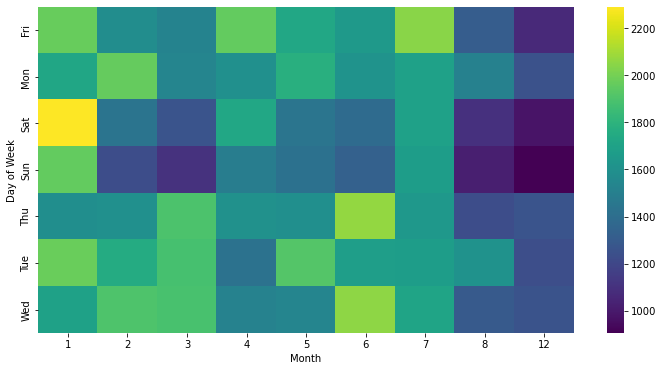

In [67]:
plt.figure(figsize = (12,6))
sns.heatmap(dayMonth, cmap = 'viridis')

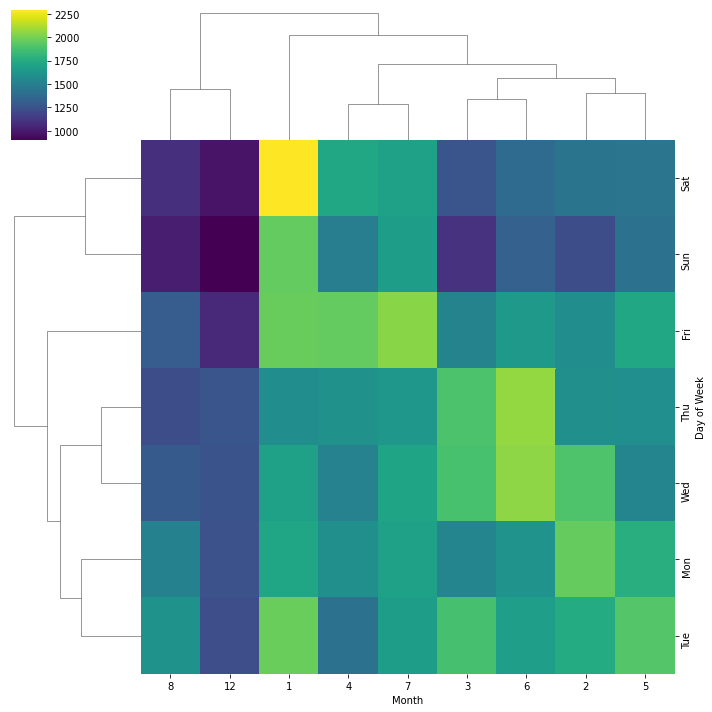

In [68]:
sns.clustermap(dayMonth, cmap = 'viridis')